In [2]:
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from pmdarima.datasets.ausbeer import load_ausbeer
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
series = load_ausbeer(as_series=True)

In [5]:
series.head()

0    284.0
1    213.0
2    227.0
3    308.0
4    262.0
dtype: float64

In [6]:
len(series)

212

## Preprocessing

In [11]:
series_ = series.fillna(value=np.mean(series))

## Visualizing

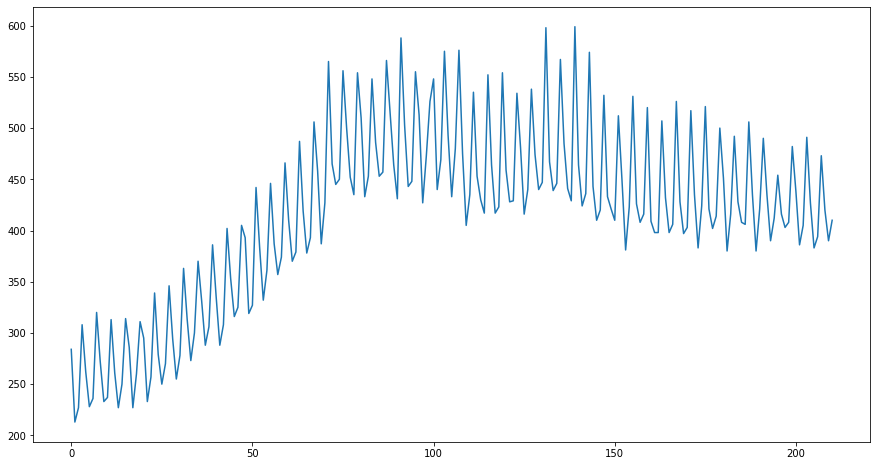

In [7]:
plt.figure(figsize=(15, 8))
sns.lineplot(series)
plt.show()

## Detrending

### Subtracting from Line of Best Fit

In [8]:
from scipy import signal

In [13]:
detrended = signal.detrend(series_.values)

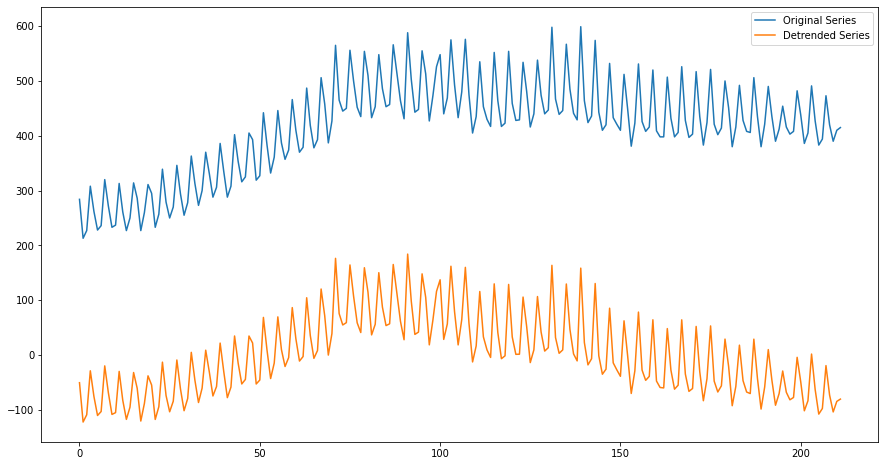

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(series_, label="Original Series")
plt.plot(detrended, label="Detrended Series")
plt.legend(loc='best')
plt.show()

#### Intermediate Observations
The signal object did not sufficiently remove the trend as we can see from the plot. We try other methods.

### Subtracting from Decomposed Series

In [23]:
multiplicative = seasonal_decompose(series_, model='multiplicative', period=20)
detrended = series_.values - multiplicative.trend

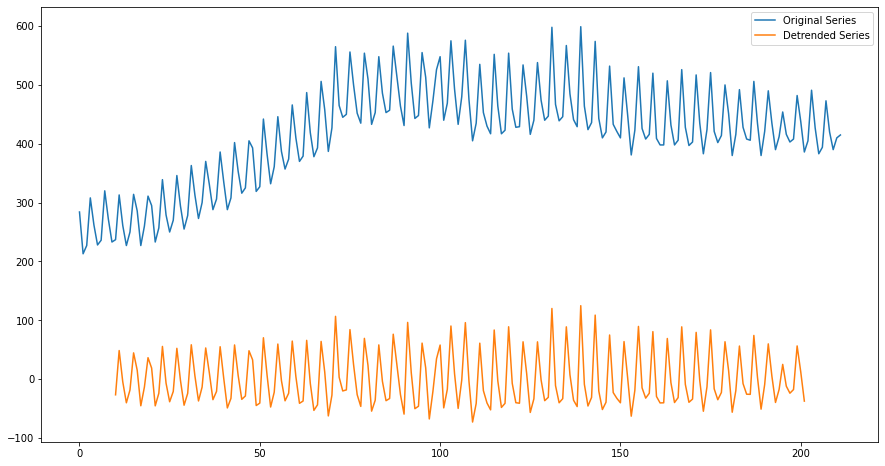

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(series_, label="Original Series")
plt.plot(detrended, label="Detrended Series")
plt.legend(loc='best')
plt.show()

#### Conclusion
This works great, succesfully detrending the series with minimal effort. I wonder if this method generalizes well or as with many techniques, depends on the dataset.

## Seasonality

### Deseasonalizing

In [27]:
multiplicative = seasonal_decompose(series_, model='multiplicative', period=20)
deseasonalized = series_.values / multiplicative.seasonal

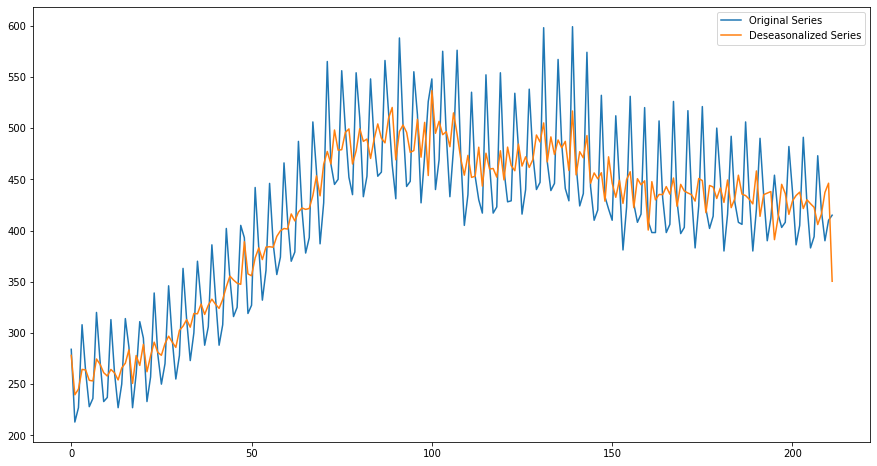

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(series_, label="Original Series")
plt.plot(deseasonalized, label="Deseasonalized Series")
plt.legend(loc='best')
plt.show()

#### Conclusion
This effectively removes the seasonal component, leaving us with a smoother trend line

## Forecasting

In [35]:
from pmdarima.arima import auto_arima

In [34]:
train = series[:200]
test = series[200:]

In [36]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1899.291, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2252.492, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2244.209, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2139.073, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2250.534, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2016.356, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1719.990, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1757.620, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1723.730, Time=0.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1723.796, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1840.658, Time=0.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1748.591, Time=0.65 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1715.728, Time=0.71 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : 

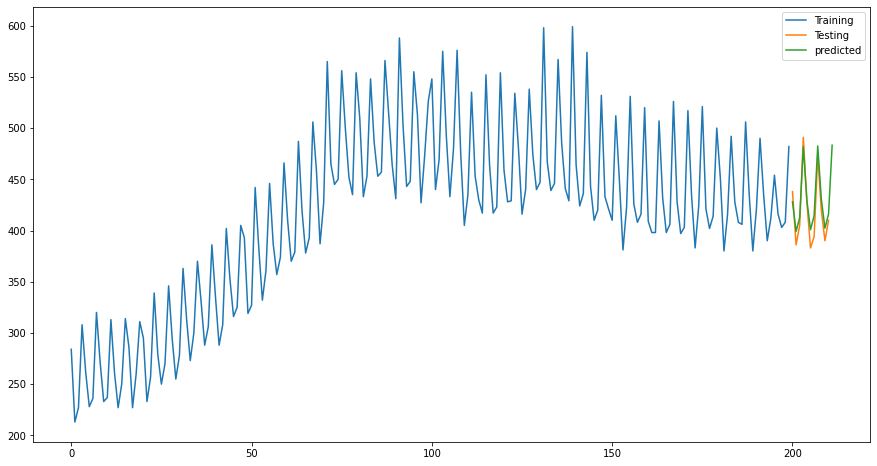

In [42]:
plt.figure(figsize=(15, 8))
plt.plot(train, label="Training")
plt.plot(test, label="Testing")
plt.plot(forecast, label="predicted")
plt.legend(loc='best')
plt.show()

## Conclusion
This is actually remarkably accurate. Even with minimal pre-processing or tuning we have gotten a prediction that is very similar to the actual results.

This has not worked out so well in the past so we learn